In [14]:
from yahoofinancials import YahooFinancials
import pandas as pd
import stockquotes
import requests
from bs4 import BeautifulSoup
import ast
import matplotlib.pyplot as plt
import seaborn as sns

 Install yahoofinancials
 Using Yahoo Financials Rep (Very Advanced Package - All Datas from Yahoo)

In [2]:
yahoo_get = YahooFinancials('META')
data = yahoo_get.get_historical_price_data('2017-07-01', '2022-07-01', 'daily')
df = pd.DataFrame(data)
df.to_csv('META.csv')
df.head(10)

,META
currency,USD
eventsData,{}
firstTradeDate,"{'formatted_date': '2012-05-18', 'date': 13373..."
instrumentType,EQUITY
prices,"[{'date': 1499088600, 'high': 152.149993896484..."
timeZone,{'gmtOffset': -14400}


In [39]:
data = yahoo_get.get_stock_price_data()
current_df = pd.DataFrame(data)
current_df.loc['regularMarketPrice']

META    159.5114
Name: regularMarketPrice, dtype: object

In [3]:
df = pd.read_csv('META.csv')


In [4]:
data_dict = ast.literal_eval(df.iloc[4,1])
data_dict = pd.DataFrame(data_dict)

In [16]:
data_dict.tail()

,date,high,low,open,close,volume,adjclose,formatted_date
1253,1656077400,170.250000,161.300003,161.729996,170.160004,61991200,170.160004,2022-06-24
1254,1656336600,171.750000,168.009995,171.320007,169.490005,29174600,169.490005,2022-06-27
1255,1656423000,171.300003,160.610001,169.899994,160.679993,27744500,160.679993,2022-06-28
1256,1656509400,166.330002,160.320007,163.570007,163.940002,28595200,163.940002,2022-06-29
1257,1656595800,165.229996,158.490005,162.149994,161.250000,35193500,161.250000,2022-06-30


In [6]:
data_dict.shape

(1258, 8)

<AxesSubplot:>

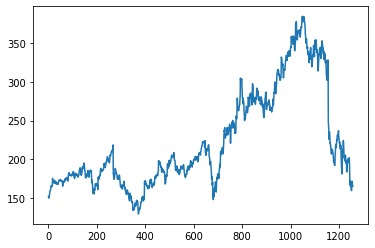

In [7]:
data_dict['high'].plot()


<AxesSubplot:ylabel='high'>

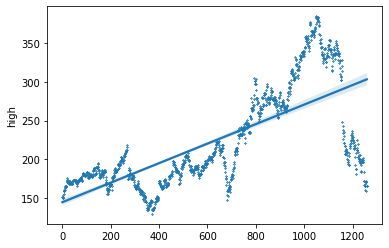

In [19]:
x = [x for x in range(1, 1258+1)]
sns.regplot(x=x, y=data_dict['high'], marker='x', scatter_kws={'s':2})

/home/jey/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='high', ylabel='Density'>

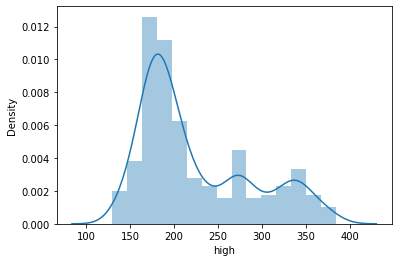

In [20]:
sns.distplot(data_dict['high'], hist=True)

<AxesSubplot:ylabel='high'>

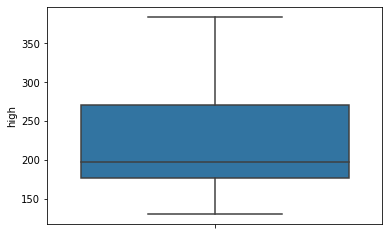

In [21]:
sns.boxplot(y = data_dict['high'])

<AxesSubplot:>

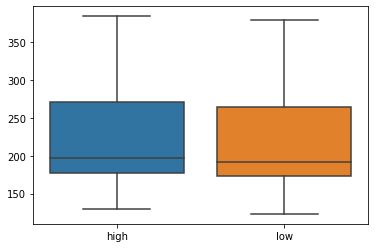

In [22]:
sns.boxplot(data = data_dict.loc[:, ['high', 'low']])

<AxesSubplot:>

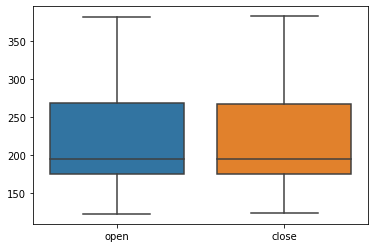

In [23]:
sns.boxplot(data = data_dict.loc[:, ['open', 'close']])